# 데이콘 Basic 축구선수 유망 여부 예측 AI 경진대회
- 16세부터 21세의 축구 선수들의 유망 여부를 예측하는 AI 알고리즘 개발 (이진 분류)

## 1. Library 및 Data Load

In [1]:
import random
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

pd.options.display.max_rows = 70
pd.options.display.max_columns = 70
warnings.filterwarnings('ignore')

In [2]:
# 한글 처리
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
# 데이터 불러오기
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

## 2. EDA 및 시각화

In [4]:
total_df = train.drop(columns=['ID'])
total_df.head()

,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,3.2353,3.9394,6.3158,6.2295,4.8864,2.4176,6.7045,5.1807,1.8391,5.1087,2.7586,1.8889,5.3571,5.7303,4.8193,6.0976,5.0000,4.5312,5.3333,4.8684,6.8493,6.6667,6.4789,2.0690,5.7647,6.4773,4.8936,3.8095,4.5349,5.3012,6.7416,6.7816,6.6667,0.9091,0.7955,0.3297,0.7865,0.9091,4.3836,4.6053,4.4737,4.4737,4.4737,4.6053,4.5333,4.8649,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
1,21,160,75,ST,Left,High,Medium,7.3913,7.3684,4.2647,5.9091,2.6316,6.2295,4.5455,7.6923,6.2500,5.4217,6.5517,7.3913,6.4368,5.2222,4.5238,5.8427,8.4337,7.1951,6.9737,6.4062,8.8000,6.9737,6.8493,7.4074,7.0423,7.5862,3.7647,3.7500,7.1277,6.4286,8.6047,6.1446,2.8090,3.3333,2.9762,1.2500,1.1364,0.6593,0.6742,1.3636,6.9863,6.8421,6.8421,6.8421,6.8421,6.8421,6.6667,6.4865,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0
2,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,3.9706,3.9394,4.8684,4.4262,5.9091,4.0659,5.2273,5.5422,2.1839,5.3261,3.3333,4.4444,5.4762,5.6180,6.7470,6.8293,6.1842,1.8750,6.1333,3.1579,6.1644,6.6667,4.2254,4.2529,4.0000,4.8864,5.6383,4.1667,4.0698,3.7349,5.0562,5.9770,5.9524,0.7955,0.9091,1.3187,1.0112,1.0227,4.5205,5.2632,4.7368,4.7368,4.7368,5.2632,4.9333,5.2703,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,0.4412,0.3030,4.6053,4.0984,1.9318,1.6484,4.4318,2.6506,2.6437,2.0652,2.6437,2.3333,2.0238,2.8090,5.5422,5.7317,3.2895,2.6562,4.4000,2.3684,6.0274,5.5556,4.3662,2.2989,4.0000,5.5682,2.2340,2.1429,3.2558,3.2530,5.2809,5.0575,5.2381,1.2500,0.7955,0.8791,0.8989,1.3636,2.3288,2.3684,2.2368,2.2368,2.2368,2.3684,2.1333,2.2973,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
4,21,181,77,ST,Right,High,Medium,8.2609,7.3684,5.4412,6.9697,1.3158,5.9016,6.8182,7.9121,6.2500,6.6265,7.2414,7.7174,4.8276,6.7778,5.1190,7.5281,9.1566,7.9268,8.4211,6.5625,6.6667,6.9737,3.0137,7.1605,6.3380,7.5862,5.4118,1.7045,7.9787,6.3095,6.8605,6.3855,2.5843,1.6092,1.0714,1.0227,0.6818,1.2088,1.3483,0.4545,7.6712,7.7632,7.6316,7.6316,7.6316,7.7632,7.4667,7.5676,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0


In [5]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3019 non-null   int64  
 1   Height             3019 non-null   int64  
 2   Weight             3019 non-null   int64  
 3   Position           3019 non-null   object 
 4   PreferredFoot      3019 non-null   object 
 5   AttackingWorkRate  3019 non-null   object 
 6   DefensiveWorkRate  3019 non-null   object 
 7   PaceTotal          3019 non-null   float64
 8   ShootingTotal      3019 non-null   float64
 9   PassingTotal       3019 non-null   float64
 10  DribblingTotal     3019 non-null   float64
 11  DefendingTotal     3019 non-null   float64
 12  PhysicalityTotal   3019 non-null   float64
 13  Crossing           3019 non-null   float64
 14  Finishing          3019 non-null   float64
 15  HeadingAccuracy    3019 non-null   float64
 16  ShortPassing       3019 

In [6]:
total_df.describe()

,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.00000,3019.000000,3019.000000,3019.000000
mean,19.632329,180.892348,73.081153,5.760521,4.292595,4.080918,4.708363,3.816096,4.549276,4.371896,4.345083,4.750821,5.368810,4.048384,5.415954,4.241490,3.796328,4.694633,5.555829,6.115808,6.044850,5.783241,3.927158,5.839417,4.483316,5.226804,5.300832,4.679659,4.278840,4.570037,4.255209,4.712949,4.711863,4.484968,4.634023,4.185553,4.313868,4.279642,1.492854,1.459996,1.409684,1.440693,1.487171,4.601225,5.020833,4.836344,4.836344,4.836344,5.020833,4.946363,4.961191,4.748056,4.961191,4.874432,4.508399,4.874432,4.852789,4.33072,4.852789,1.424188,0.361047
std,1.235638,6.800187,6.539758,1.298024,1.624982,1.301538,1.366596,2.029423,1.414989,1.790045,2.037801,1.718073,1.627738,1.743603,1.971838,1.748832,1.532390,1.643123,1.798204,1.844954,1.822515,1.930989,1.247837,1.898949,1.508987,1.447769,1.807786,1.683236,1.990667,1.715511,2.174812,1.915240,1.445694,1.647784,1.327883,2.104758,2.251930,2.248174,1.723756,1.662393,1.605038,1.610872,1.754476,1.737719,1.841542,1.780348,1.780348,1.780348,1.841542,1.782596,1.814854,1.677262,1.814854,1.815744,1.809723,1.815744,1.877633,1.88076,1.877633,1.606925,0.480384
min,16.000000,160.000000,49.000000,0.724600,0.526300,0.000000,0.000000,0.000000,0.000000,0.113600,0.000000,0.113600,0.602400,0.000000,0.217400,0.000000,0.111100,0.595200,0.337100,0.000000,0.000000,0.131600,0.000000,0.133300,0.263200,1.095900,0.123500,0.281700,0.000000,0.000000,0.227300,0.106400,0.595200,0.000000,0.602400,0.112400,0.114900,0.238100,0.340900,0.340900,0.329700,0.337100,0.340900,0.000000,0.131600,0.131600,0.131600,0.131600,0.131600,0.133300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000
25%,19.000000,176.000000,69.000000,4.927500,3.092100,3.235300,3.939400,1.842100,3.606600,3.295500,2.802200,4.090900,4.698800,2.988500,4.891300,3.218400,2.888900,3.571400,5.056200,5.662700,5.487800,4.868400,3.125000,4.800000,3.421100,4.520500,4.691400,3.521100,2.873600,3.352950,2.159100,3.723400,3.630950,3.604700,3.855400,2.247200,2.183900,2.023800,0.681800,0.681800,0.659300,0.674200,0.681800,3.972600,4.342100,4.078900,4.078900,4.078900,4.342100,4.266700,4.459500,4.109600,4.459500,4.225400,3.571400,4.225400,4.000000,3.05560,4.000000,0.750000,0.000000
50%,20.000000,180.000000,73.000000,5.797100,4.605300,4.117600,4.848500,4.210500,4.590200,4.772700,4.615400,5.000000,5.783100,4.252900,5.978300,4.367800,3.777800,5.000000,6.067400,6.506000,6.341500,6.052600,3.906200,6.133300,4.605300,5.342500,5.679000,4.647900,4.597700,4.823500,4.886400,5.319100,4.881000,4.651200,4.698800,4.606700,4.942500,4.881000,1.022700,0.909100,0.879100,1.011200,0.909100,4.931500,5.526300,5

In [7]:
# 질적 변수
qual_df = total_df[['Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate', 'Prospect']]
# 양적 변수
quan_df = total_df.drop(columns = ['Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate', 'Prospect'])

In [8]:
# # 양적 변수 분포 시각화
# quan_df.hist(bins=100, figsize=(25, 25))
# plt.show()

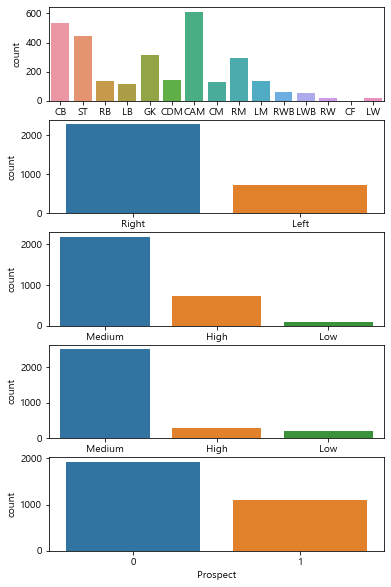

In [9]:
# 질적 변수 빈도 시각화
fig, axes = plt.subplots(5, 1, figsize=(6, 10))

sns.countplot(x=qual_df['Position'], ax=axes[0])
sns.countplot(x=qual_df['PreferredFoot'], ax=axes[1])
sns.countplot(x=qual_df['AttackingWorkRate'], ax=axes[2])
sns.countplot(x=qual_df['DefensiveWorkRate'], ax=axes[3])
sns.countplot(x=qual_df['Prospect'], ax=axes[4])

plt.show()

In [10]:
# 이상치 확인
box_df = quan_df[['Age', 'Height', 'Weight']]

<AxesSubplot:ylabel='Weight'>

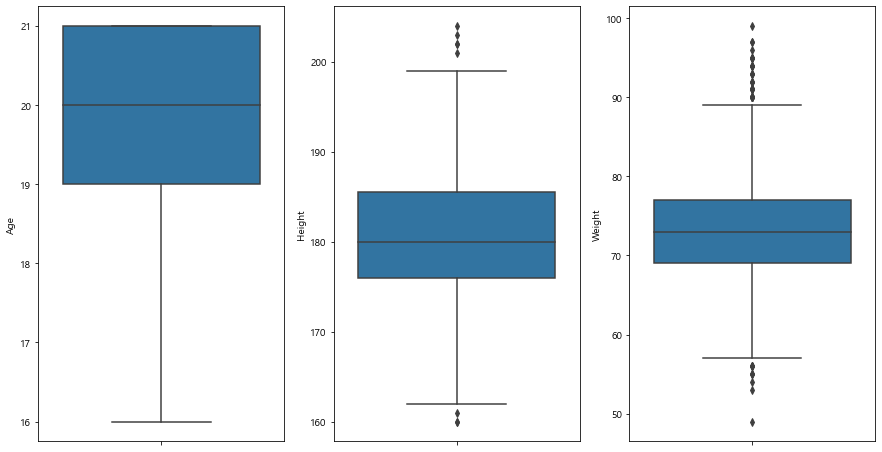

In [11]:
# 단위가 다른 데이터 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.boxplot(y=box_df['Age'], ax=axes[0])
sns.boxplot(y=box_df['Height'], ax=axes[1])
sns.boxplot(y=box_df['Weight'], ax=axes[2])

In [12]:
# # 상관관계 확인
# plt.figure(figsize=(30, 27))
# sns.heatmap(total_df.corr(), annot=True, fmt='.1f', linewidth=1, cmap='Blues')
# plt.show()

## 3. 데이터 전처리

### 1) LabelEncoding

In [13]:
qual_col = ['Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train[i])
    
    train[i] = le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[i] = le.transform(test[i])
print('Done')

Done


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3019 non-null   object 
 1   Age                3019 non-null   int64  
 2   Height             3019 non-null   int64  
 3   Weight             3019 non-null   int64  
 4   Position           3019 non-null   int32  
 5   PreferredFoot      3019 non-null   int32  
 6   AttackingWorkRate  3019 non-null   int32  
 7   DefensiveWorkRate  3019 non-null   int32  
 8   PaceTotal          3019 non-null   float64
 9   ShootingTotal      3019 non-null   float64
 10  PassingTotal       3019 non-null   float64
 11  DribblingTotal     3019 non-null   float64
 12  DefendingTotal     3019 non-null   float64
 13  PhysicalityTotal   3019 non-null   float64
 14  Crossing           3019 non-null   float64
 15  Finishing          3019 non-null   float64
 16  HeadingAccuracy    3019 

## 4. 모델링

### KFold 교차검증

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [16]:
X = train.drop(['ID', 'Prospect'], axis=1)
y = train['Prospect']

In [17]:
target = test.drop(['ID'], axis=1)

In [18]:
X.shape, y.shape, target.shape

((3019, 64), (3019,), (1626, 64))

### 1) DecisionTree

In [27]:
dt = DecisionTreeClassifier(random_state=42)

In [28]:
score_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    score = f1_score(y_test, pred)
    score_list.append(score)

In [29]:
dt_score = np.mean(score_list)
print('dt:', dt_score)

dt: 0.5708463705138838


In [30]:
dt_pred = dt.predict(target)

In [31]:
submission['Prospect'] = dt_pred
submission.to_csv('./result/dt.csv', index=False)

### 2) RandomForest

In [19]:
rf = RandomForestClassifier(random_state=42)

In [20]:
score_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    score = f1_score(y_test, pred)
    score_list.append(score)

In [21]:
rf_score = np.mean(score_list)
print('rf:', rf_score)

rf: 0.6558827523216935


In [22]:
rf_pred = rf.predict(target)

In [23]:
submission['Prospect'] = rf_pred
submission.to_csv('./result/rf.csv', index=False)

### 3) RandomForest - GridSearchCV

In [34]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [35]:
grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]})

In [36]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 10}


In [37]:
rf_cv = RandomForestClassifier(n_estimators = 10, 
                                max_depth = 12,
                                min_samples_leaf = 12,
                                min_samples_split = 8,
                                random_state = 42,
                                n_jobs = -1)

In [38]:
score_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf_cv.fit(X_train, y_train)
    pred = rf_cv.predict(X_test)
    score = f1_score(y_test, pred)
    score_list.append(score)

In [39]:
rf_cv_score = np.mean(score_list)
print('rf_cv:', rf_cv_score)

rf_cv: 0.6561006546078845


In [41]:
rf_cv_pred = rf_cv.predict(target)

In [42]:
submission['Prospect'] = rf_cv_pred
submission.to_csv('./result/rf_cv.csv', index=False)

### 4) XGB

In [70]:
xgb = XGBClassifier(random_state=42)

In [71]:
score_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    score = f1_score(y_test, pred)
    score_list.append(score)

In [72]:
xgb_score = np.mean(score_list)
print('xgb:', xgb_score)

xgb: 0.6534456620042318


In [73]:
xgb_pred = xgb.predict(target)

In [74]:
submission['Prospect'] = xgb_pred
submission.to_csv('./result/xgb.csv', index=False)

### 5) LGBM

In [77]:
lgbm = LGBMClassifier(random_state=42)

In [78]:
score_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    lgbm.fit(X_train, y_train)
    pred = lgbm.predict(X_test)
    score = f1_score(y_test, pred)
    score_list.append(score)

In [79]:
lgbm_score = np.mean(score_list)
print('lgbm:', lgbm_score)

lgbm: 0.6698343073947987


In [80]:
lgbm_pred = lgbm.predict(target)

In [81]:
submission['Prospect'] = lgbm_pred
submission.to_csv('./result/lgbm.csv', index=False)

### 6) CatBoost

In [84]:
cat = CatBoostClassifier(random_state=42, silent=True)

In [85]:
score_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    cat.fit(X_train, y_train)
    pred = cat.predict(X_test)
    score = f1_score(y_test, pred)
    score_list.append(score)

In [86]:
cat_score = np.mean(score_list)
print('cat:', cat_score)

cat: 0.6716101686619735


In [87]:
cat_pred = cat.predict(target)

In [88]:
submission['Prospect'] = cat_pred
submission.to_csv('./result/cat.csv', index=False)

## 5. 분석 결과 시각화

In [89]:
s = {'dt': dt_score, 'rf': rf_score, 'rf_cv': rf_cv_score,
    'xgb': xgb_score, 'lgbm': lgbm_score, 'cat': cat_score}
s

{'dt': 0.5708463705138838,
 'rf': 0.6558827523216935,
 'rf_cv': 0.6561006546078845,
 'xgb': 0.6534456620042318,
 'lgbm': 0.6698343073947987,
 'cat': 0.6716101686619735}

In [91]:
result = pd.DataFrame.from_dict(s, orient='index')
result.reset_index(level=0, inplace=True)
result.columns = ['model', 'nmae']
result

,model,nmae
0,dt,0.570846
1,rf,0.655883
2,rf_cv,0.656101
3,xgb,0.653446
4,lgbm,0.669834
5,cat,0.671610


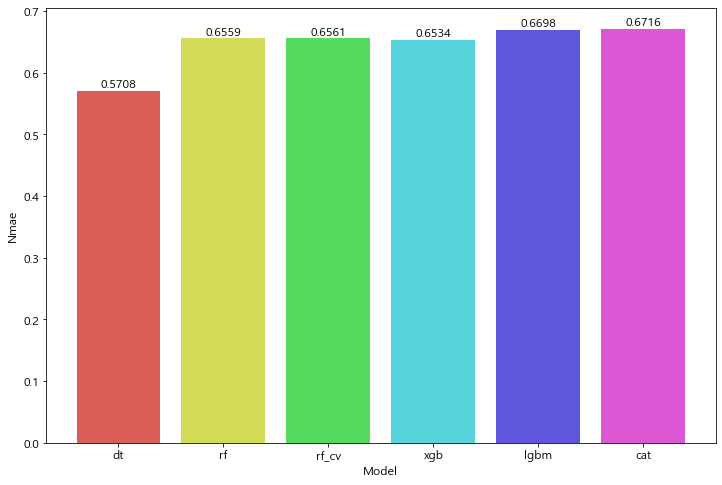

In [92]:
plt.figure(figsize=[12, 8])
plt.rc('font', size=12)
colors = sns.color_palette('hls',len(result['model']))

bar = plt.bar(result['model'], result['nmae'], color=colors)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.4f' % height, ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Nmae')
plt.show()

In [109]:
def plot_feature_importance(importance, names, model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(10, 30))
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

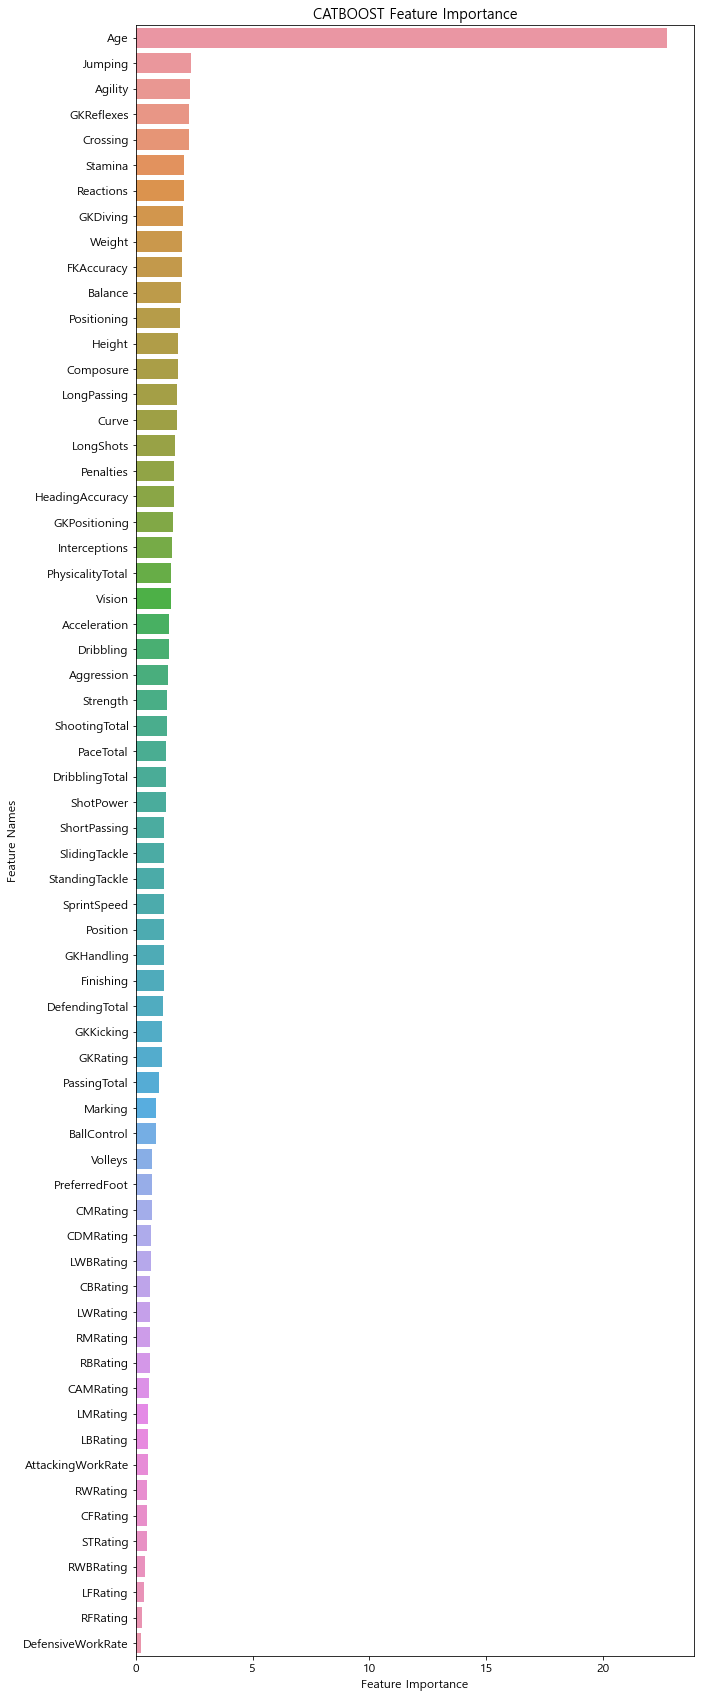

In [110]:
plot_feature_importance(cat.get_feature_importance(), target.columns, 'CATBOOST')